# Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib.metadata
import numpy as np
import seaborn as sns

from datetime import datetime, timedelta
from itables import show
from mpl_toolkits.basemap import Basemap

from my_functions import clean_dataframe

In [2]:
!python --version

Python 3.11.5


In [3]:
# Version des bibliothèques utilisées
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

print("matplotlib - ", importlib.metadata.version('matplotlib'))

pandas - 2.0.3
numpy - 1.24.3
seaborn - 0.12.2
matplotlib -  3.7.2


In [4]:
pd.set_option('display.max_columns', None)

# Imports

In [5]:
items = pd.read_csv('order_items.csv')
payments = pd.read_csv('order_payments.csv')
reviews = pd.read_csv('order_reviews.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv')
customers = pd.read_csv('customers.csv')
geolocation = pd.read_csv('geolocation.csv')
cat_translation = pd.read_csv('product_category_name_translation.csv')

### Traduction des catégories

In [6]:
cat_translation['product_category_name_english'] = cat_translation['product_category_name_english'].replace('fashio_female_clothing', 'fashion_female_clothing')

In [7]:
products = products.merge(cat_translation, on='product_category_name', how='left')

In [8]:
products[['product_category_name', 'product_category_name_english']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          32341 non-null  object
 1   product_category_name_english  32328 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


On a quelques produits pour lesquels la traduction ne s'est pas faite.

In [9]:
display(products[(products['product_category_name_english'].isna()) & (~products['product_category_name'].isna())])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


'pc_gamer' est transparent, on le laisse ainsi.   
on traduit 'portateis_cozinha_e_preparadores_de_alimentos' par 'small_kitchen_appliances'

In [10]:
# filling
products['product_category_name_english'].fillna(products['product_category_name'], inplace=True)

# translating 
products['product_category_name_english'].replace('portateis_cozinha_e_preparadores_de_alimentos', 'small_kitchen_appliances', inplace=True)

# checking
products[['product_category_name', 'product_category_name_english']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          32341 non-null  object
 1   product_category_name_english  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [11]:
# the numbers match, let's replace the portuguese column
products['product_category_name'] = products['product_category_name_english']

# and delete translation column
products.drop('product_category_name_english', axis=1, inplace=True)

### Concaténation des datasets

In [12]:
df = pd.merge(orders, items, on='order_id')
df = pd.merge(df, products, on='product_id')
df = pd.merge(df, sellers, on='seller_id')
df = pd.merge(df, customers, on='customer_id')
df = pd.merge(df, payments, on='order_id')
df = pd.merge(df, reviews, on='order_id')

# spelling mistakes in column names
df.rename(columns={'product_name_lenght': 'product_name_length', 
                         'product_description_lenght': 'product_description_length'}, inplace=True)

In [13]:
# adding customers GPS coordinates
geolocation['geolocation_lat'] = geolocation['geolocation_lat'].round(2)
geolocation['geolocation_lng'] = geolocation['geolocation_lng'].round(2)
geolocation = geolocation[~((geolocation['geolocation_lng'] == -64.28) & (geolocation['geolocation_lat'] == -36.61))]
geolocation_unique = geolocation.drop_duplicates('geolocation_zip_code_prefix')
geolocation_indexed = geolocation_unique.set_index('geolocation_zip_code_prefix')

df['geolocation_lat'] = df['customer_zip_code_prefix'].map(geolocation_indexed['geolocation_lat'])
df['geolocation_lng'] = df['customer_zip_code_prefix'].map(geolocation_indexed['geolocation_lng'])

In [14]:
print('shape du dataframe :', df.shape)
print('----')
df.info()

shape du dataframe : (117329, 41)
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  obje

On va convertir les données dans le bon format (notamment les dates) pour pouvoir les utiliser.

In [15]:
df = clean_dataframe(df, 
                to_integer=['order_item_id',
                            'product_name_length',
                            'product_description_length',
                            'product_photos_qty',
                            'seller_zip_code_prefix',
                            'customer_zip_code_prefix',
                            'payment_sequential',
                            'payment_installments',
                            'review_score'], 
                to_string=['order_id', 
                           'customer_id', 
                           'order_status',
                           'product_id',
                           'seller_id',
                           'seller_city',
                           'seller_state',
                           'customer_unique_id',
                           'customer_city',
                           'customer_state',
                           'payment_type',
                           'review_id',
                           'review_comment_title',
                           'review_comment_message'],  
                to_datetime=['order_purchase_timestamp', 
                             'order_approved_at', 
                             'order_delivered_carrier_date',
                             'order_delivered_customer_date',
                             'order_estimated_delivery_date',
                             'shipping_limit_date',
                             'review_creation_date',
                             'review_answer_timestamp']
               )

In [16]:
shape1=df.shape
print('shape du dataframe :', df.shape)
print('----')
df.info()

shape du dataframe : (117329, 41)
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  Int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                    

In [17]:
# Only keeping orders that have been delivered
df = df[df['order_status'] == 'delivered']

In [18]:
print('shape du dataframe :', df.shape)
print('commandes non livrées :', shape1[0]-df.shape[0])

shape du dataframe : (114859, 41)
commandes non livrées : 2470


### Traitement des NaN

In [19]:
display(df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1626
product_name_length              1626
product_description_length       1626
product_photos_qty               1626
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_unique_id                  0
customer_zip

In [20]:
# filling missing delivery dates (for delivered orders) by estimated delivery date
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace=True)

# filling missing product_category by unknown
df['product_category_name'].fillna('unknown', inplace=True)

# filling missing order_approved_at by order timestamp
df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace=True)

# filling missing order_delivered_carrier_date by order_approved_at + 2 days 
df['order_delivered_carrier_date'].fillna(df['order_approved_at'] + timedelta(days=2), inplace=True)

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df['delay'] =  df['order_delivered_customer_date'] - df['order_estimated_delivery_date']

In [23]:
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_time_days'] = df['delivery_time'].dt.total_seconds() / (24 * 60 * 60)
df['delivery_time_days'] = df['delivery_time_days'].round(2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114859 entries, 0 to 114858
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       114859 non-null  object         
 1   customer_id                    114859 non-null  object         
 2   order_status                   114859 non-null  object         
 3   order_purchase_timestamp       114859 non-null  datetime64[ns] 
 4   order_approved_at              114859 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   114859 non-null  datetime64[ns] 
 6   order_delivered_customer_date  114859 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  114859 non-null  datetime64[ns] 
 8   order_item_id                  114859 non-null  Int64          
 9   product_id                     114859 non-null  object         
 10  seller_id                      114859 non-null  object  

In [25]:
# replacing 'negative delays' ie orders delivered on time, by 0

# converting 0 to datetime
zero_timedelta = pd.to_timedelta(0, unit='D')

df.loc[df['delay'] < zero_timedelta, 'delay'] = zero_timedelta

In [26]:
print(df['customer_id'].unique().shape[0])

95831


# Localisation

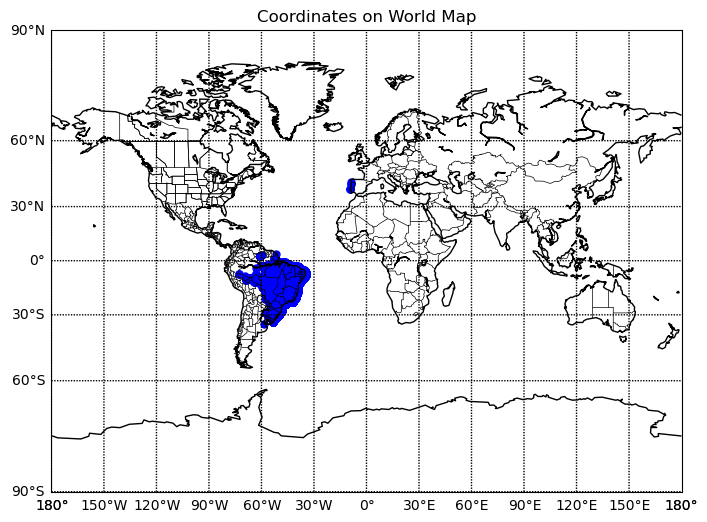

In [27]:
plt.figure(figsize=(10, 6))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

# borders
m.drawcoastlines()
m.drawcountries()
m.drawstates()


x, y = m(df['geolocation_lng'].values, df['geolocation_lat'].values)

# Plot coordinates on the map
m.scatter(x, y, color='blue', s=25)

# Parallels and meridians
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False])
m.drawmeridians(range(-180, 181, 30), labels=[False, False, False, True])


plt.title('Coordinates on World Map')
plt.show()

On a quelques clients qui ne sont pas situés au Brésil, mais au Portugal. Nous allon exclure du dataframe les lignes dont les coordonées ne corrspondent pas à des clients brésiliens.   
Pour cela, on va éliminer les clients dont la latitude est supérieure à 30, et la longitude supérieure à -20

In [28]:
shape1 = df.shape[0]
df = df[(df['geolocation_lat'] <= 30) & (df['geolocation_lng'] <= -10)]
print('Lignes supprimées : ', shape1-df.shape[0])

Lignes supprimées :  308


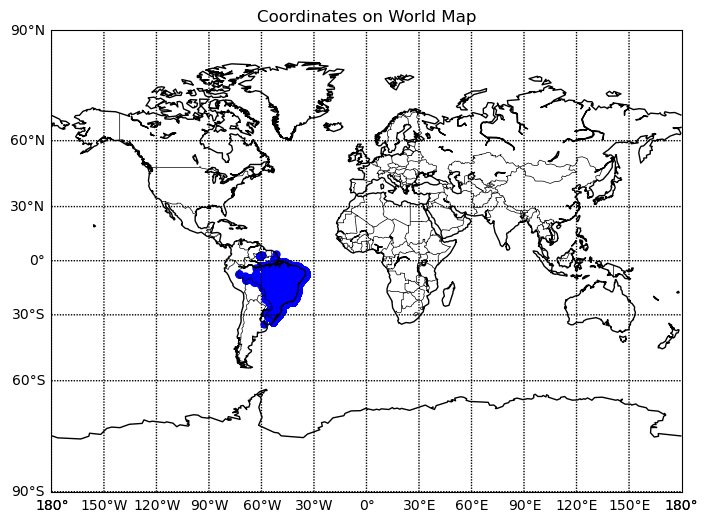

In [29]:
plt.figure(figsize=(10, 6))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

# borders
m.drawcoastlines()
m.drawcountries()

x, y = m(df['geolocation_lng'].values, df['geolocation_lat'].values)

m.scatter(x, y, color='blue', s=25)

# Parallels and meridians
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False])
m.drawmeridians(range(-180, 181, 30), labels=[False, False, False, True])


plt.title('Coordinates on World Map')
plt.show()

Tout semble réglé, zoomons un peu pour être certains.

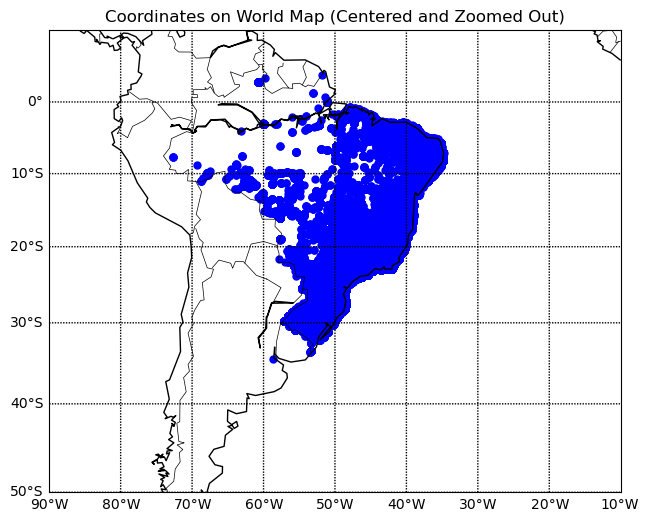

In [30]:
plt.figure(figsize=(10, 6))
m = Basemap(projection='mill', llcrnrlat=-50, urcrnrlat=10,
            llcrnrlon=-90, urcrnrlon=-10, resolution='c')

# borders
m.drawcoastlines()
m.drawcountries()


x, y = m(df['geolocation_lng'].values, df['geolocation_lat'].values)


m.scatter(x, y, color='blue', s=25)

# parallels and meridians
m.drawparallels(range(-90, 91, 10), labels=[True, False, False, False])
m.drawmeridians(range(-180, 181, 10), labels=[False, False, False, True])


plt.title('Coordinates on World Map (Centered and Zoomed Out)')
plt.show()

Tout est bon, excepté pour un point situé en argentine, éliminons le de la même manière qu'avant.

In [31]:
shape1 = df.shape[0]
df = df[(df['geolocation_lng'] >= -55) | (df['geolocation_lat'] >= -33)]
print('Lignes supprimées : ', shape1-df.shape[0])

Lignes supprimées :  1


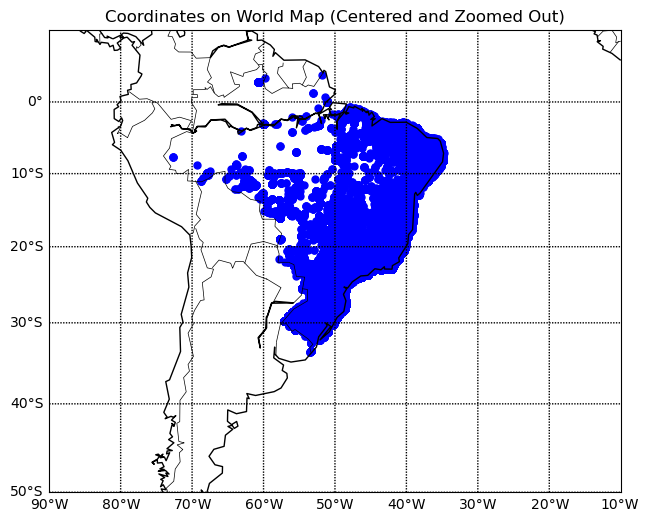

In [32]:
plt.figure(figsize=(10, 6))
m = Basemap(projection='mill', llcrnrlat=-50, urcrnrlat=10,
            llcrnrlon=-90, urcrnrlon=-10, resolution='c')

# borders
m.drawcoastlines()
m.drawcountries()

x, y = m(df['geolocation_lng'].values, df['geolocation_lat'].values)


m.scatter(x, y, color='blue', s=25)

# parallels and meridians
m.drawparallels(range(-90, 91, 10), labels=[True, False, False, False])
m.drawmeridians(range(-180, 181, 10), labels=[False, False, False, True])


plt.title('Coordinates on World Map (Centered and Zoomed Out)')
plt.show()

Tout est bon.

# Etude des clients b2b

In [33]:
b2b = df[['order_id', 'customer_unique_id', 'order_item_id', 'product_category_name', 'payment_value', 'review_score', 'review_comment_title', 'review_comment_message']]

In [34]:
b2b_sorted = b2b.sort_values(by='order_item_id', ascending=False)

# creating a dataframe with one row per order, even if this order as several items
b2b_unique = b2b_sorted.drop_duplicates(subset=b2b.columns.difference(['order_item_id']), keep='first')


In [35]:
b2b_grouped = b2b_unique.groupby('customer_unique_id').agg({'order_item_id': 'sum', 'payment_value': 'sum', 'order_id': 'size', 'product_category_name': lambda x: x.mode()[0]}).reset_index()
b2b_grouped['mean_items_per_order'] = b2b_grouped['order_item_id'] / b2b_grouped['order_id']

On va classifier comme 'b2b_customers' les clients ayant réalisé des commandes :  
    - comportant plus de 8 fois le même produit   
    - avec un montant supérieur à 400 

In [36]:
b2b_filter = b2b_grouped[(b2b_grouped['mean_items_per_order'] >= 8) & (b2b_grouped['payment_value'] >= 400)]

In [37]:
# creating b2b customers list 
b2b_customers = b2b_filter['customer_unique_id'].tolist()
print(len(b2b_customers))

25


In [39]:
# excluding b2b customers from database
df = df[~df['customer_unique_id'].isin(b2b_customers)]

# Construction du fichier clients

In [41]:
print(df['order_id'].unique().shape)

(95535,)


In [42]:
print(payments['order_id'].unique().shape)

(99440,)


In [43]:
print(df['customer_unique_id'].unique().shape)

(92469,)


### Date of first/last order, nb of orders per customer

In [44]:
clients = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': ['min', 'max'],
    'order_id': 'nunique'
})

In [45]:
clients.columns = ['first_order_dt', 'last_order_dt', 'nb_orders']

In [46]:
display(clients.sort_values(by='nb_orders'))

,first_order_dt,last_order_dt,nb_orders
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1
a93d650696fec6d9deeb0d34fc61e6b0,2017-11-13 15:33:47,2017-11-13 15:33:47,1
a93d5bc325f8844f5ae36b1c9b79b3e0,2018-08-02 13:57:47,2018-08-02 13:57:47,1
a93d58cd1757d89a7bacf6c63d905b98,2018-07-16 19:20:36,2018-07-16 19:20:36,1
a93d53df97ef9b5c960bfa7bf49605b5,2018-04-01 17:28:50,2018-04-01 17:28:50,1
...,...,...,...
1b6c7548a2a1f9037c1fd3ddfed95f33,2017-11-13 16:44:41,2018-02-14 13:22:12,7
6469f99c1f9dfae7733b25662e7f1782,2017-09-19 01:02:44,2018-06-28 00:43:34,7
ca77025e7201e3b30c44b472ff346268,2017-10-09 12:34:39,2018-06-01 11:38:29,7


In [47]:
print(clients['nb_orders'].sum())

95535


### Payments per customer

In [48]:
order_customer = df[['order_id','customer_unique_id']].drop_duplicates()

In [49]:
order_value = payments[['order_id','payment_value']]
order_value = order_value.drop_duplicates()
order_value = order_value.groupby('order_id')['payment_value'].sum().reset_index()
print(order_value.shape)

(99440, 2)


In [50]:
order_value = order_value.merge(order_customer, on='order_id', how='left')
payment_per_customer = order_value.groupby('customer_unique_id')['payment_value'].sum().reset_index()

In [51]:
clients = clients.merge(payment_per_customer, on='customer_unique_id', how='left')
display(clients)

,customer_unique_id,first_order_dt,last_order_dt,nb_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89
...,...,...,...,...,...
92464,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,1,2067.42
92465,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,84.58
92466,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,112.46
92467,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,133.69


### Mean review per customer 

In [52]:
review_per_customer = df[['customer_unique_id', 'review_id', 'review_score']]
review_per_customer = review_per_customer.drop_duplicates()
review_per_customer = review_per_customer.groupby('customer_unique_id')['review_score'].mean().reset_index()

In [53]:
clients = clients.merge(review_per_customer, on='customer_unique_id', how='left')
clients.rename(columns={'review_score': 'mean_review_score'}, inplace=True)
display(clients)

,customer_unique_id,first_order_dt,last_order_dt,nb_orders,payment_value,mean_review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,5.0
...,...,...,...,...,...,...
92464,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,1,2067.42,5.0
92465,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,84.58,4.0
92466,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,112.46,5.0
92467,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,133.69,5.0


### Mean delay per customer

In [54]:
delay_per_customer = df[['customer_unique_id', 'order_id', 'delay']]
delay_per_customer = delay_per_customer.drop_duplicates()
delay_per_customer = delay_per_customer.groupby('customer_unique_id')['delay'].mean().reset_index()

In [55]:
clients = clients.merge(delay_per_customer, on='customer_unique_id', how='left')
clients.rename(columns={'delay': 'mean_delay'}, inplace=True)

In [56]:
clients['mean_delay_days'] = clients['mean_delay'].dt.days + clients['mean_delay'].dt.seconds / (24 * 60 * 60)
clients.drop(columns=['mean_delay'], inplace=True)

In [57]:
display(clients.sort_values(by='mean_delay_days', ascending=False))

,customer_unique_id,first_order_dt,last_order_dt,nb_orders,payment_value,mean_review_score,mean_delay_days
85028,eb21169c3153a2b507fc7e76d561ff14,2018-02-23 14:57:35,2018-02-23 14:57:35,1,162.25,2.0,188.975081
27746,4cb8ad9a4554099db7d70c13d0dae906,2018-01-03 09:44:01,2018-01-03 09:44:01,1,453.33,1.0,175.869109
43694,78d26ae26b5bb9cb398edc7384d3c15f,2017-03-13 20:17:10,2017-03-13 20:17:10,1,55.95,1.0,167.708414
21791,3c2564d42f7ddd8b7576f0dd9cb1b4c5,2017-03-08 22:47:40,2017-03-08 22:47:40,1,457.65,1.0,166.583380
86909,f0785d41d416fa827f24c4b95d066b69,2017-03-07 23:59:51,2017-03-07 23:59:51,1,185.02,1.0,165.633912
...,...,...,...,...,...,...,...
32149,58b140151c2e86124d5ed6a6b6b5b7cd,2017-12-04 12:15:23,2017-12-04 12:15:23,1,299.39,3.0,0.000000
32148,58b13e38278bc529ac05bb4b526cdbfb,2017-12-23 18:30:20,2017-12-23 18:30:20,1,330.70,5.0,0.000000
32147,58b0ed369d1c4863af2222165501c756,2018-06-22 15:47:19,2018-06-22 15:47:19,1,31.53,5.0,0.000000
32146,58b0b4757ff906f793b80dfeaa1d757f,2018-03-01 17:44:41,2018-03-01 17:44:41,1,222.68,3.0,0.000000


### Mean delivery time per customer

In [58]:
delivery_per_customer = df[['customer_unique_id', 'order_id', 'delivery_time_days']]
delivery_per_customer = delivery_per_customer.drop_duplicates()
delivery_per_customer = delivery_per_customer.groupby('customer_unique_id')['delivery_time_days'].mean()

In [59]:
clients = clients.merge(delivery_per_customer, on='customer_unique_id', how='left')
clients.rename(columns={'delivery_time_days': 'mean_delivery_time'}, inplace=True)

In [60]:
display(clients.sort_values(by='mean_delivery_time', ascending=False))

,customer_unique_id,first_order_dt,last_order_dt,nb_orders,payment_value,mean_review_score,mean_delay_days,mean_delivery_time
85028,eb21169c3153a2b507fc7e76d561ff14,2018-02-23 14:57:35,2018-02-23 14:57:35,1,162.25,2.0,188.975081,208.35
86909,f0785d41d416fa827f24c4b95d066b69,2017-03-07 23:59:51,2017-03-07 23:59:51,1,185.02,1.0,165.633912,195.63
71848,c6c0b794d3e4eb69cd85d1438a0db26e,2017-03-08 18:09:02,2017-03-08 18:09:02,1,345.15,4.0,155.606447,194.85
21791,3c2564d42f7ddd8b7576f0dd9cb1b4c5,2017-03-08 22:47:40,2017-03-08 22:47:40,1,457.65,1.0,166.583380,194.63
28198,4df2d7257a7463e2d7a98a5b08cb92fc,2017-03-09 13:26:57,2017-03-09 13:26:57,1,259.15,4.0,161.609965,194.05
...,...,...,...,...,...,...,...,...
77424,d5f0cd2eb93b7fc7c2350e758af16dc9,2018-05-18 15:03:19,2018-05-18 15:03:19,1,43.28,5.0,0.000000,0.89
70956,c4320fbd4bc46bc041e8c2b703a05cd6,2017-07-04 11:37:47,2017-07-04 11:37:47,1,194.48,3.0,0.000000,0.86
6911,13071413b2d7b730db1cd98a4611f2b2,2018-06-26 20:48:33,2018-06-26 20:48:33,1,765.84,1.0,0.000000,0.86
43457,781f80ac54444e4020dc3f70f044d8b3,2017-05-29 13:21:46,2017-05-29 13:21:46,1,62.76,3.0,0.000000,0.78


In [61]:
display(clients.describe())

,first_order_dt,last_order_dt,nb_orders,payment_value,mean_review_score,mean_delay_days,mean_delivery_time
count,92469,92469,92469.000000,92469.000000,92469.0,92469.000000,92469.000000
mean,2018-01-01 15:26:35.960473600,2018-01-04 06:28:42.139354880,1.033157,164.267266,4.154008,0.758118,12.516828
min,2016-10-03 09:44:50,2016-10-03 16:56:50,1.000000,6.180000,1.0,0.000000,0.530000
25%,2017-09-13 16:46:39,2017-09-17 19:40:28,1.000000,62.840000,4.0,0.000000,6.770000
50%,2018-01-20 13:16:10,2018-01-23 10:32:39,1.000000,107.780000,5.0,0.000000,10.210000
75%,2018-05-05 18:33:24,2018-05-07 20:32:35,1.000000,181.820000,5.0,0.000000,15.640000
max,2018-08-29 15:00:37,2018-08-29 15:00:37,15.000000,7571.630000,5.0,188.975081,208.350000
std,NaN,NaN,0.208410,219.566497,1.279621,4.676785,9.452846


### Plots

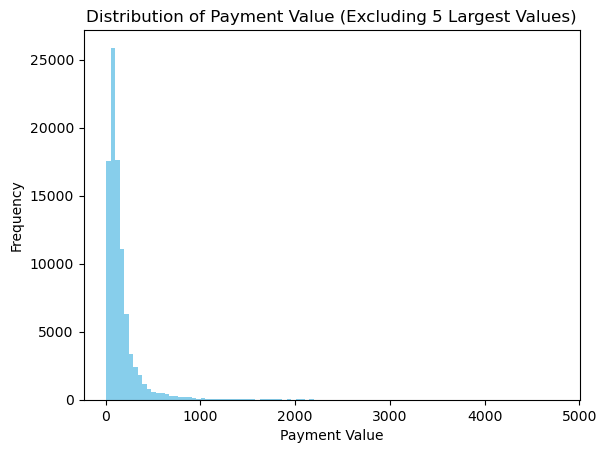

In [62]:
excluded_values = clients['payment_value'].nlargest(5)

# Plot a histogram of 'payment_value' excluding the 5 largest values
plt.hist(clients['payment_value'][~clients['payment_value'].isin(excluded_values)], bins=100, color='skyblue')
plt.title('Distribution of Payment Value (Excluding 5 Largest Values)')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

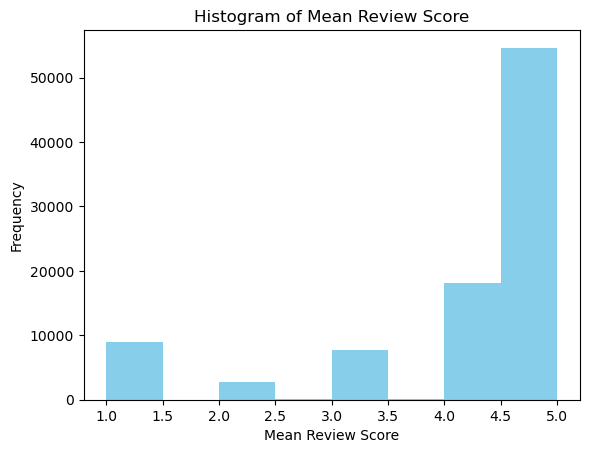

In [63]:
plt.hist(clients['mean_review_score'], bins=8, color='skyblue')
plt.title('Histogram of Mean Review Score')
plt.xlabel('Mean Review Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Temporalité 

In [64]:
timeline = df[['order_id', 'order_purchase_timestamp']].copy()

In [65]:
timeline['order_purchase_date'] = timeline['order_purchase_timestamp'].dt.date
timeline.drop(columns=['order_purchase_timestamp'], inplace=True)

### By date

In [66]:
order_count_by_date = timeline.groupby('order_purchase_date')['order_id'].nunique()

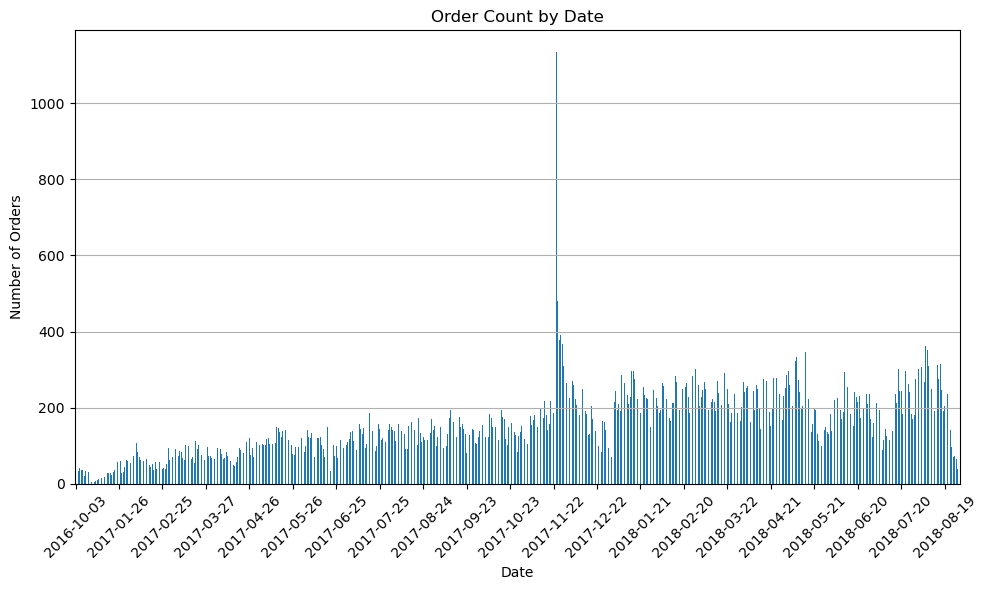

In [67]:
plt.figure(figsize=(10, 6))
order_count_by_date.plot(kind='bar')
plt.title('Order Count by Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(axis='y')  
plt.xticks(range(0, len(order_count_by_date), 30), order_count_by_date.index[::30], rotation=45)  
plt.tight_layout()  
plt.show()

On a un pic de commandes très clair, localisons le un peu mieux

In [68]:
order_count_by_date = timeline.groupby('order_purchase_date')['order_id'].nunique().reset_index()
order_count_by_date.columns = ['order_purchase_date', 'order_count']
display(order_count_by_date.sort_values(by='order_count', ascending=False).head(10))

,order_purchase_date,order_count
332,2017-11-24,1135
333,2017-11-25,481
335,2017-11-27,390
334,2017-11-26,377
336,2017-11-28,366
587,2018-08-06,361
496,2018-05-07,359
503,2018-05-14,353
588,2018-08-07,351
505,2018-05-16,350


Le 24 novembre 2017, le nombre de commandes est immense. Les jours suivants font également partie des jours avec le plus de commandes, mais plus mesuré.   
Explication ?

### By month

In [69]:
timeline['order_purchase_date'] = pd.to_datetime(timeline['order_purchase_date'])

# Extract year and month from 'order_purchase_date'
timeline['order_purchase_month'] = timeline['order_purchase_date'].dt.strftime('%Y-%m')

In [70]:
order_count_by_month = timeline.groupby('order_purchase_month')['order_id'].nunique()

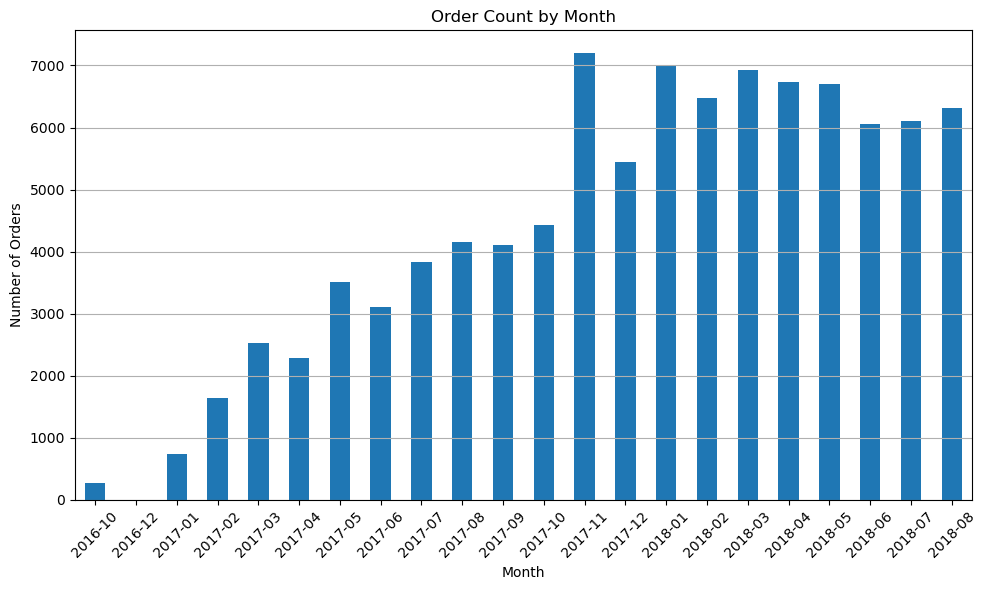

In [71]:
plt.figure(figsize=(10, 6))
order_count_by_month.plot(kind='bar')
plt.title('Order Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(axis='y')  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

On remarque un trou en décembre 2016. Erreur de mesure ? erreur de report ?

# Quelques statistiques

### Products

In [72]:
df_products = df[['product_id', 'order_id', 'payment_value', 'review_score']]
df_products = df_products.drop_duplicates()

In [73]:
product_stats = df_products.groupby('product_id').agg({'payment_value': 'sum', 'product_id': 'count', 'review_score': 'mean'})

product_stats.rename(columns={'payment_value': 'total_ventes', 'product_id': 'nb_sold', 'review_score': 'mean_review_score'}, inplace=True)

In [74]:
show(product_stats)

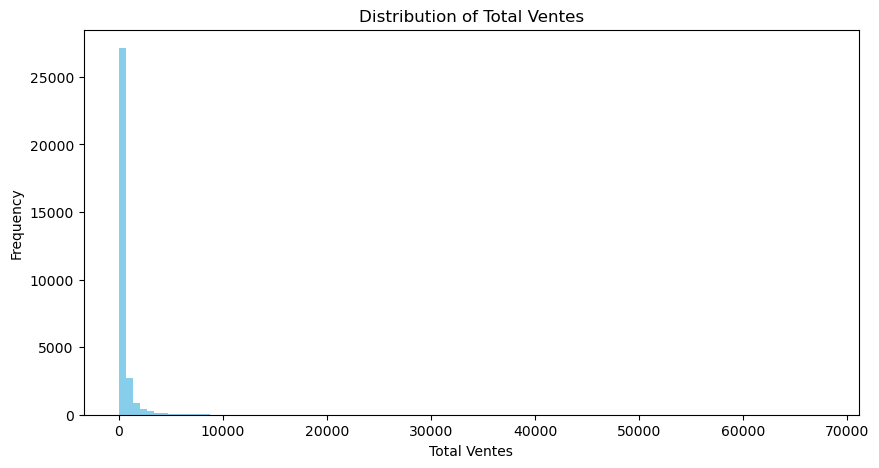

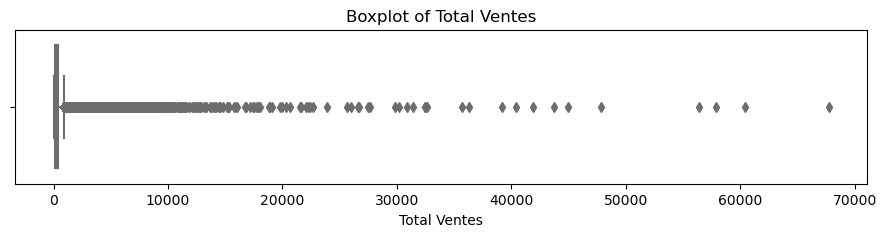

In [75]:
plt.figure(figsize=(10, 5))
plt.hist(product_stats['total_ventes'], bins=100, color='skyblue')
plt.title('Distribution of Total Ventes')
plt.xlabel('Total Ventes')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Create separate figure and axes for the boxplot
plt.figure(figsize=(11, 2))
sns.boxplot(x=product_stats['total_ventes'], color='salmon')
plt.title('Boxplot of Total Ventes')
plt.xlabel('Total Ventes')
plt.grid(False)
plt.show()

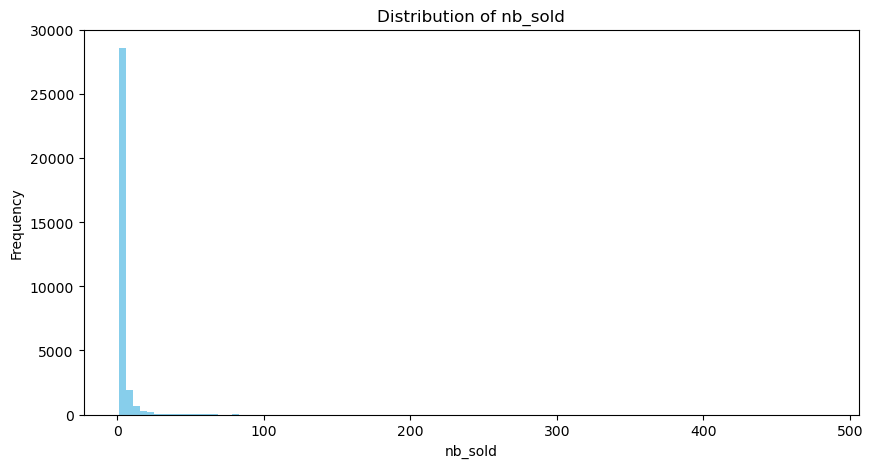

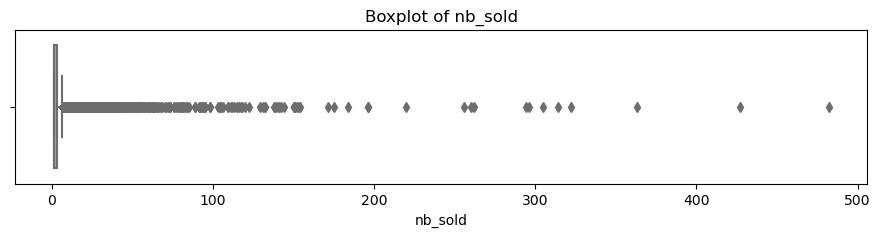

In [76]:
plt.figure(figsize=(10, 5))
plt.hist(product_stats['nb_sold'], bins=100, color='skyblue')
plt.title('Distribution of nb_sold')
plt.xlabel('nb_sold')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Create separate figure and axes for the boxplot
plt.figure(figsize=(11, 2))
sns.boxplot(x=product_stats['nb_sold'], color='salmon')
plt.title('Boxplot of nb_sold')
plt.xlabel('nb_sold')
plt.grid(False)
plt.show()

### Sellers

In [77]:
df_sellers = df[['seller_id', 'order_id', 'payment_value', 'review_score']]
df_sellers = df_sellers.drop_duplicates()

In [78]:
seller_summary = df_sellers.groupby('seller_id').agg({
    'order_id': 'nunique',
    'payment_value': ['sum','mean'],
    'review_score': 'mean'
}).reset_index()

# renaming columns
seller_summary.columns=['seller_id', 'nb_orders', 'total_sales', 'mean_sales', 'mean_review_score']

In [79]:
show(seller_summary)

In [80]:
display(seller_summary.describe())

,nb_orders,total_sales,mean_sales,mean_review_score
count,2964.000000,2964.000000,2964.000000,2964.0
mean,32.676451,5249.970695,216.296229,4.174989
std,104.433122,16031.293321,342.885851,0.7766
min,1.000000,15.220000,8.563333,1.0
25%,2.000000,290.662500,79.970000,3.968498
50%,7.000000,1058.585000,129.341667,4.284032
75%,22.000000,4183.202500,215.820951,4.666667
max,1800.000000,248885.760000,6929.310000,5.0


### Customer State

In [81]:
df_state_c = df[['order_id', 'customer_state', 'payment_value', 'review_score', 'delay']]
df_state_c = df_state_c.drop_duplicates()

In [82]:
customer_state_summary = df_state_c.groupby('customer_state').agg({
    'order_id': 'nunique',
    'payment_value': ['sum', 'mean'],
    'review_score': 'mean',
    'delay': 'mean'
}).reset_index()

# renaming columns
customer_state_summary.columns=['customer_state', 'nb_orders', 'total_sales', 'mean_sales', 'mean_review_score', 'mean_delay']

In [83]:
show(customer_state_summary)

### Seller state

In [84]:
df_state_s = df[['order_id', 'seller_state', 'payment_value', 'review_score', 'delay']]
df_state_s = df_state_s.drop_duplicates()

In [85]:
seller_state_summary = df_state_s.groupby('seller_state').agg({
    'order_id': 'nunique',
    'payment_value': ['sum', 'mean'],
    'review_score': 'mean',
    'delay': 'mean'
}).reset_index()

# renaming columns
seller_state_summary.columns=['seller_state', 'nb_orders', 'total_sales', 'mean_sales', 'mean_review_score', 'mean_delay']

In [86]:
show(seller_state_summary)

# Exports

In [89]:
clients.to_csv('clients.csv')

In [90]:
df.to_csv('data_olist.csv')

# Conclusions

Cette BDD nous permet de calculer beaucoup d'autre metrics intéressantes : retard, temps de livraison par localisation, justesse des prédictions de livraison, etc

Quelques défauts dans la BDD : geolocation, ville OK, mais il serait intéressant de connaître le quartier. Problèmes de fuseaux horaires. 

Pas de mesures en décembre 2016, c'est étonnant.